Boston is one of the most starkly divided cities in the United States. While celebrated for its rich colonial history, prestigious education, and booming tech sector, Boston is also plagued with deep-seated racial disparities. Growing up in Charlestown and Dorchester I have witnessed firsthand how infrastructure and opportunity vary from one neighborhood to the next. This project aims to explore and visualize a publicly available dataset related to income and socioeconomic indicators across towns in the Boston area. My goal is to not just analyze, but comprehend the underlying patterns that tell us why Boston looks like the way it does.

Questions: 
Which neighborhoods have the highest and lowest median family incomes? What demographic or structural patterns explain these differences?
What demographic indicators correlate most strongly with median income acros neighborhoods?


First we need to import the necessary libraries:

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/fortuneudeh/Desktop/projectTwo/neighborhood-childcare-affordabilty-analysis.csv', index_col='Neighborhoods')
#Making the first column the index for readability

I notice certain column names start with blank space, which will make indexing difficult later, so I will clean up their names. I will also drop any unnamed columns and rows

In [24]:
columns = df.columns.tolist()
for column in columns:
    if column.startswith(' '):  # Checks if there is a blank space before the column name
        df.rename(columns={column: column.strip()}, inplace=True)  # Removes the blank space

In [25]:
df.drop(columns=['Unnamed: 18'], inplace=True)

Before seeing which neighborhoods have the highest and lowest median income, I must convert the median income column to float values to prepare for analysis

In [26]:
df['MedianIncome'] = df['MedianIncome'].replace('[\$,]', '', regex=True).astype(float)

The percentages in some columns would prohibit certain forms of wrangling, so I removed them.

In [27]:
def removePercentage(column):
    return column.replace('%', '', regex=True).astype(float)
df[[
    'WhitePer', 'BlackPer', 'LatinxPer', 'AsianPer', 'MarFam', 'MalFam', 'FemFam', 'PovPer', 'InfCostCareMedInc', 'PreCostCareMedInc', 'InfCarAfford', 'PreCareAfford', 'PopB'
    ]] = df[[ 
        'WhitePer', 'BlackPer', 'LatinxPer', 'AsianPer', 'MarFam', 'MalFam', 'FemFam', 'PovPer', 'InfCostCareMedInc', 'PreCostCareMedInc', 'InfCarAfford', 'PreCareAfford'
        ]].apply(removePercentage, axis=0).astype(float)

Also, I noticed that there are some more trailing NaN rows, so I dropped them as well

In [28]:
df = df.dropna(axis=0, how='any')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Roxbury'),
  Text(1, 0, 'East Boston'),
  Text(2, 0, 'Mattapan'),
  Text(3, 0, 'Dorchester'),
  Text(4, 0, 'Fenway/Kenmore'),
  Text(5, 0, 'Hyde Park'),
  Text(6, 0, 'Boston'),
  Text(7, 0, 'Allston/Brighton'),
  Text(8, 0, 'Roslindale'),
  Text(9, 0, 'South Boston'),
  Text(10, 0, 'South End'),
  Text(11, 0, 'Jamaica Plain'),
  Text(12, 0, 'West Roxbury'),
  Text(13, 0, 'Charlestown'),
  Text(14, 0, 'Central Boston'),
  Text(15, 0, 'Back Bay/Beacon Hill')])

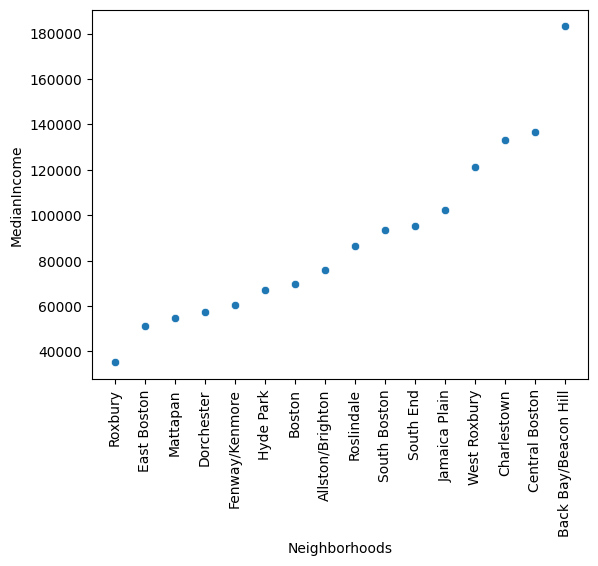

In [29]:
sorted_data = df.sort_values(by='MedianIncome')
#Plot the sorted data
sns.scatterplot(x=sorted_data.index, y='MedianIncome', data=sorted_data)
plt.xticks(rotation=90)  #Rotate x-axis labels for better readability

In [30]:
print(df['MedianIncome'].idxmax(), ':', df['MedianIncome'].max())
print(df['MedianIncome'].idxmin(), ':', df['MedianIncome'].min())

Back Bay/Beacon Hill : 183159.0
Roxbury : 35160.0


Next, I am curious about the average income throughout the entire city of Boston so I know what to compare these values to

In [31]:
df.loc['Boston']['MedianIncome']

np.float64(69616.0)

To nobody's surprise, Back Bay/Beacon Hill boasts the highest median income of 183,159 while Roxbury has the least of just 35,160. Back Bay, home to...

Next, I want to compare the demographics of neighborhoods with a median family income higher than 70,000 dollars, the average across the city of Boston, compared to neighborhoods with a median family income less than 70,000.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Allston/Brighton'),
  Text(1, 0, 'Roslindale'),
  Text(2, 0, 'South Boston'),
  Text(3, 0, 'South End'),
  Text(4, 0, 'Jamaica Plain'),
  Text(5, 0, 'West Roxbury'),
  Text(6, 0, 'Charlestown'),
  Text(7, 0, 'Central Boston'),
  Text(8, 0, 'Back Bay/Beacon Hill')])

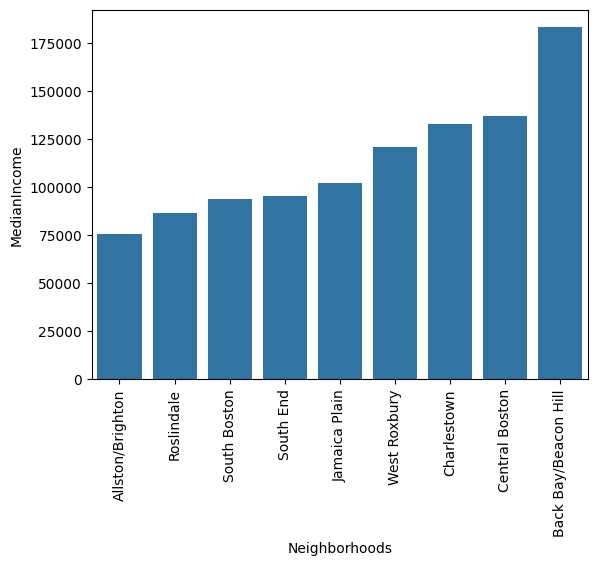

In [32]:
df['BlackPer'] = df['BlackPer'].replace('%', '', regex=True).astype(float)
upperClass = df['MedianIncome'] > 70000 #creates a series of boolean values indicating whether the MedianIncome is greater than 100000
highIncomeNeighborhoods = df[upperClass] # Filters the DataFrame to include only neighborhoods with MedianIncome greater than 100000 (creates a new DataFrame)
highIncomeNeighborhoods = highIncomeNeighborhoods.sort_values(by='MedianIncome', ascending=True)
# Plotting the high-income neighborhoods
sns.barplot(x=highIncomeNeighborhoods.index, y='MedianIncome', data=highIncomeNeighborhoods)
plt.xticks(rotation=90) 
#highIncomeNeighborhoods['MedianIncome'].plot(kind='bar', figsize=(10, 6),)

Text(0.5, 1.0, 'Low Income Neighborhoods')

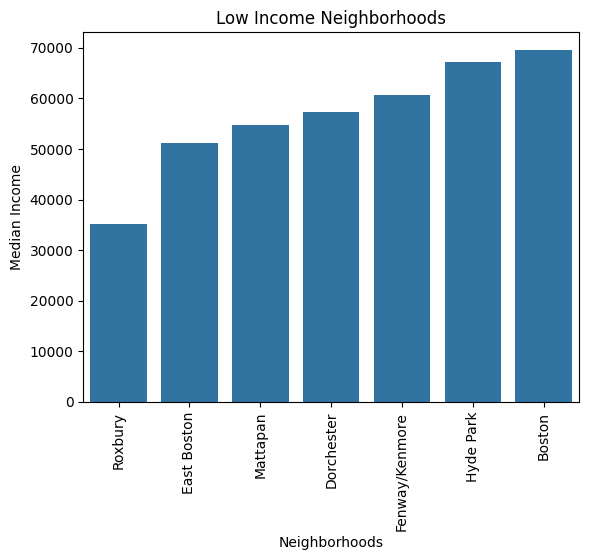

In [33]:
lowerClass = df['MedianIncome'] < 70000 #creates series of boolean values indicating whether the MedianIncome is greater than 100000
lowIncomeNeighborhoods = df[lowerClass]
lowIncomeNeighborhoods = lowIncomeNeighborhoods.sort_values(by='MedianIncome', ascending=True) #this can be a lot simpler
# Plotting the low-income neighborhoods
sns.barplot(x=lowIncomeNeighborhoods.index, y='MedianIncome', data=lowIncomeNeighborhoods)
plt.xticks(rotation=90)
plt.ylabel('Median Income')
plt.title('Low Income Neighborhoods')
#Figure out how to make all the plots LOOK better

Next, I want to visualize the racial makeup of these towns to see if race is a correlating indicator of a neighborhood's median income

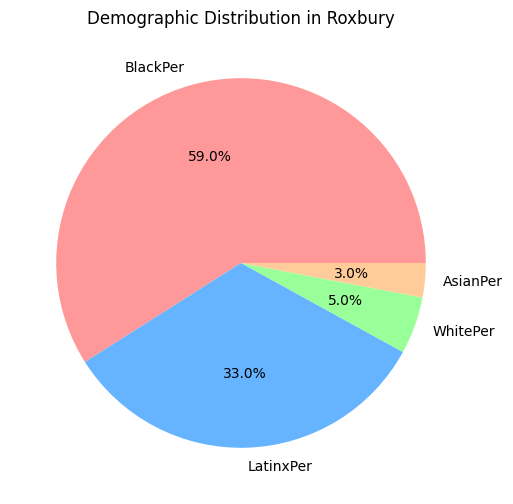

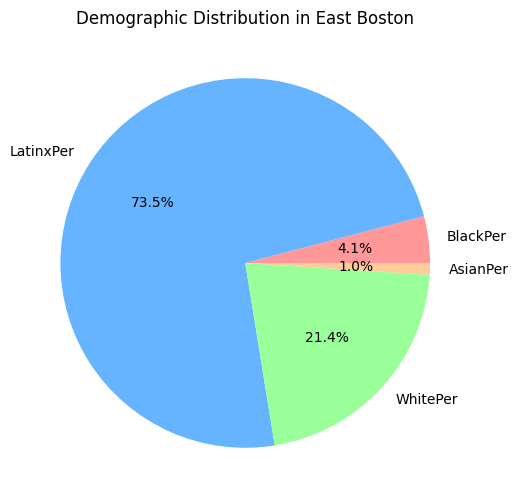

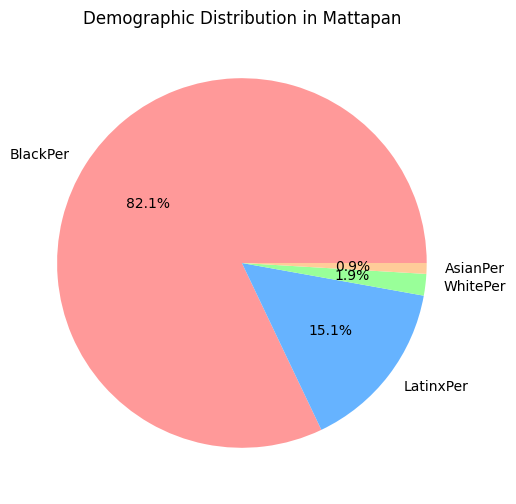

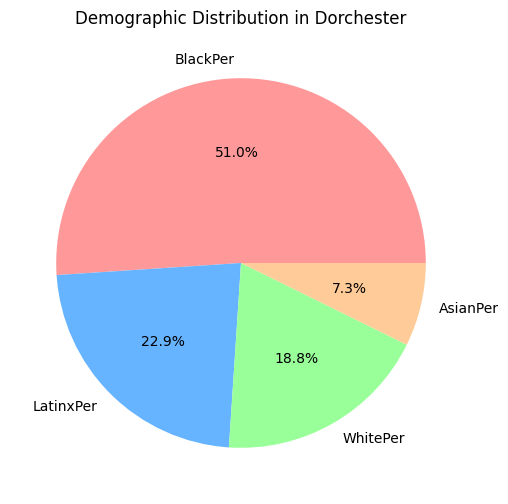

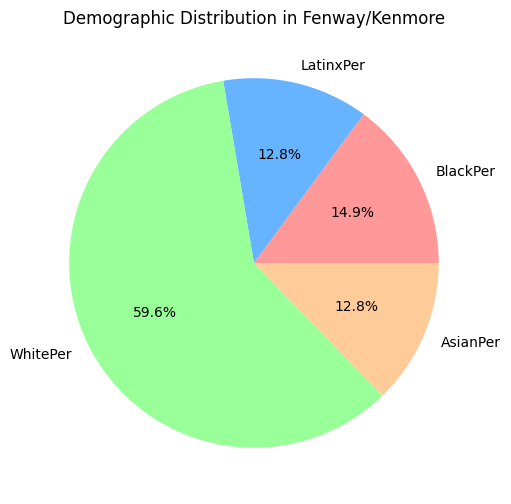

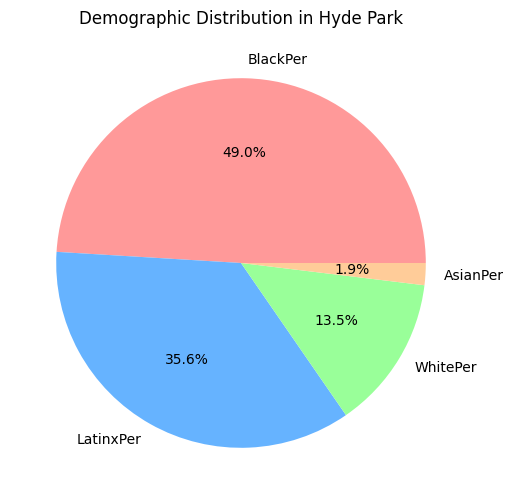

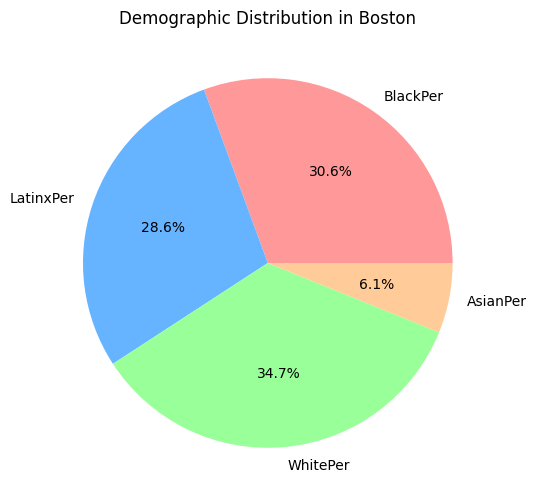

In [34]:
percentages = lowIncomeNeighborhoods[['BlackPer', 'LatinxPer', 'WhitePer', 'AsianPer']]
# Convert percentage columns to numeric values 
for neighborhood, data in lowIncomeNeighborhoods.iterrows():
    plt.figure(figsize=(8, 6))
    plt.pie(data[percentages.columns], labels=percentages.columns, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])  # Colors can be customized
    plt.title(f"Demographic Distribution in {neighborhood}")
    plt.show() 

I am noticing a lot of red and blue, which signify the percentages of Black and Latinx populations respectively. So I compared these populations to the median family income using the correlation constant to see if there was any relationship.

In [35]:
df['Black_Latinx'] = df['BlackPer'] + df['LatinxPer']
correlation_small = df[['Black_Latinx', 'MedianIncome']].corr().iloc[0,1]
print(f"Correlation: {correlation_small}")

Correlation: -0.7887454622100214


The correlation is highly negative, signifying that there is an inverse relationship between black and latinx populations and median income. Lets visualize it with a regression plot,

<Axes: xlabel='Black_Latinx', ylabel='MedianIncome'>

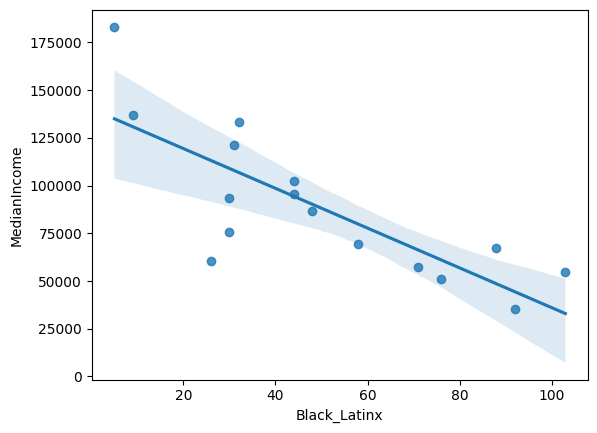

In [36]:
# Plotting the correlation
sns.regplot(x='Black_Latinx', y='MedianIncome', data=df)

I want to look a bit closer, however. Are there any other telling relationshiops I can explore using the correlation constant?

In [37]:
dfGrouped = df[['WhitePer', 'BlackPer', 'LatinxPer', 'AsianPer', 'PovPer', 'MedianIncome']]
correlation = dfGrouped.corr()
comparedToIncome = correlation['MedianIncome']
comparedToIncome

WhitePer        0.796844
BlackPer       -0.586200
LatinxPer      -0.561444
AsianPer        0.282295
PovPer         -0.776633
MedianIncome    1.000000
Name: MedianIncome, dtype: float64

The white percentage of the population correlates strongly to the median income. As the percentage of white population goes up, so does a town's median income. What about the other columns of this dataset? Are there any other correlative variables? 

In [41]:
"""correlation1 = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()"""

df.dtypes

PopBto5               object
Pop0to2               object
Pop3to5               object
ParentLabFor          object
WhitePer             float64
BlackPer             float64
LatinxPer            float64
AsianPer             float64
MarFam               float64
MalFam               float64
FemFam               float64
PovPer               float64
MedianIncome         float64
InfCostCareMedInc    float64
PreCostCareMedInc    float64
InfCarAfford         float64
PreCareAfford        float64
Black_Latinx         float64
dtype: object

This heatmap feels pretty overwhelming, so I reduced the output of the correlation to valued greater than 0.6 or less than -0.6, indicating a strong proportional or inversely proportional relationship.

In [357]:
filtered_correlation = correlation1[(correlation1 > 0.6) | (correlation1 < -0.6)]
comparedToIncome1 = filtered_correlation['MedianIncome']
comparedToIncome1

PopBto5                   NaN
Pop0to2                   NaN
Pop3to5                   NaN
ParentLabFor              NaN
WhitePer             0.796844
BlackPer                  NaN
LatinxPer                 NaN
AsianPer                  NaN
MarFam               0.762879
MalFam                    NaN
FemFam              -0.655994
PovPer              -0.776633
MedianIncome         1.000000
InfCostCareMedInc   -0.880936
PreCostCareMedInc   -0.883850
InfCarAfford        -0.942425
PreCareAfford       -0.953207
Black_Latinx        -0.788745
Name: MedianIncome, dtype: float64

It makes sense that the poverty percentage has an inverse relationship with median income. I realized that the other columns arent very telling of the family median income either. So, in a perfect world devoid of arbitrary classifications such as race, what should the median family income be for each town of Boston?

First, I must identify which features encode racial bias in order to exclude them.

In [370]:
realX = df.drop(columns=['MedianIncome', 'Black_Latinx'])  # Features excluding the target variable and the combined demographic feature
equity_features = ['PopBto5', 'Pop0to2', 'Pop3to5', 'ParentLabFor']
equityX = df[equity_features]  # Drops columns that I deem to be biased when predicting median income

y = df['MedianIncome']  # Target variable
y.dropna(how='all', inplace=True)  # Ensure the target variable doesnt contain NaN values


Why I excluded each column:


'BlackPer', 'LatinxPer', 'WhitePer', 'AsianPer': These are explicit racial categories that contradict the goal of modeling a world without racial bias

'MarFam': Including this could unintentionally reintroduce bias by associating certain family types with lower income.

'MalFam': Same as last

'FemFam': Same as last

'InfCarAfford': This reflects the outcome of systemic inequities. Those who cannot afford the cost of infant care are likely to be in those marginalized racial groups I previously excluded.
'PreCareAfford': Same as last
'InfCostCareMedInc': Same as last
'PreCostCareMedInc': Same as last
'PovPer': This is represented as an outcome of systems such as redlining, underemployment, etc. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#equity model
Xe_train, Xe_test, ye_train, ye_test = train_test_split(equityX, y, test_size=0.2, random_state=42)

#real world model
Xr_train, Xr_test, yr_train, yr_test = train_test_split(realX, y, test_size=0.2, random_state=42)

#fit the models
real_model = LinearRegression().fit(Xr_train, yr_train)
equity_model = LinearRegression().fit(Xe_train, ye_train)

predictedReal = real_model.predict(Xr_test)
predictedEquity = equity_model.predict(Xe_test)

NameError: name 'equityX' is not defined

Using r^2 value to see how well prediciton fits

In [2]:
from sklearn.metrics import r2_score
#real model
r2_real = r2_score(yr_test, predictedReal)
print(f'R^2 value for the real model: {r2_real:.2f}')

#equity model
r2_equity = r2_score(ye_test, predictedEquity)
print(f'R^2 value for the equity model: {r2_equity:.2f}')

NameError: name 'r2_score' is not defined

What these r^2 values mean:

Next steps: MSE, Bias Gap, Visualize predictions vs actuals

In [3]:
from sklearn.metrics import mean_squared_error
mse_real = mean_squared_error(yr_test, predictedReal)
mse_equity = mean_squared_error(ye_test, predictedEquity)
print(f"Mean Squared Error (Real Model): {mse_real:.2f}")
print(f"Mean Squared Error (Equity Model): {mse_equity:.2f}")

NameError: name 'yr_test' is not defined

In [ ]:


sns.barplot(x=df.index, y='Bias_Gap', data=df)
plt.xticks(rotation=45)
plt.title('Real vs. Equity Predicted Income (Bias Gap)')
plt.ylabel('Predicted Income Difference ($)')

Final Remarks: Finally, it is worth noting that Massachussetts ranks 3rd (I think) in test scores accordiung to this standardized test, but when you disaggregate it by race we rank 47th by state (some sort of fact like this) Quantifying the racial income gap.